In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
dataHP = pd.read_csv("../data/raw/train.csv")
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
dataHP['LotFrontage'].isnull().mean()

np.float64(0.1773972602739726)

In [14]:
col_con_nan = []

for col in dataHP.columns:
       porcentaje_faltante = dataHP[col].isnull().mean()
       if(porcentaje_faltante > 0):
              col_con_nan.append(col)

col_con_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [15]:
dataHP[col_con_nan].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

#### 2. Efecto del CCA - Complete Case Analysis

In [16]:
cols_for_cca = [col for col in dataHP.columns if dataHP[col].isnull().mean() < 0.06]
cols_for_cca

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolA

In [17]:
dataHP_cca = dataHP[cols_for_cca].dropna()
dataHP.shape, dataHP_cca.shape

((1460, 81), (1338, 74))

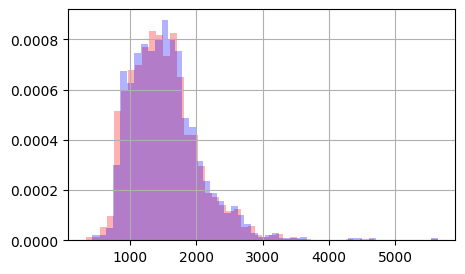

In [18]:
fig = plt.figure(figsize=(5, 3))
ax = fig.add_subplot(111)

dataHP['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red', alpha=0.3)
dataHP_cca['GrLivArea'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.3)
plt.show()

#### Imputación por Media y Mediana

### Imputación de Variables Categóricas

In [20]:
dataHP.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [22]:
dataHP['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

#### Extraemos columnas con datos categóricos

In [23]:
categoricas = []

for col in dataHP.columns:
       tipo = dataHP[col].dtype
       if(tipo == 'object'):
              categoricas.append(col)

In [24]:
categoricas = [col for col in dataHP.columns if dataHP[col].dtype == 'object']
categoricas

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [25]:
categoricas

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
dataCat = dataHP[['BsmtQual', 'FireplaceQu', 'SalePrice']]
dataCat.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [27]:
dataCat.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [28]:
dataCat['BsmtQual'].value_counts(normalize=True)

BsmtQual
TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: proportion, dtype: float64

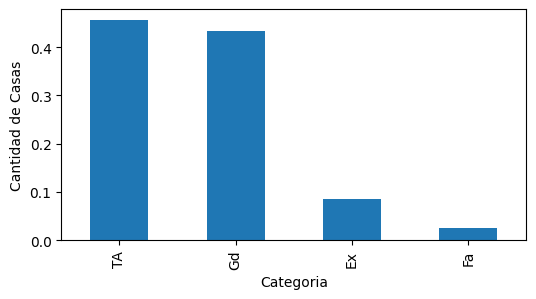

In [29]:
plt.figure(figsize=(6, 3))
dataCat['BsmtQual'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Categoria")
plt.ylabel("Cantidad de Casas")
plt.show()

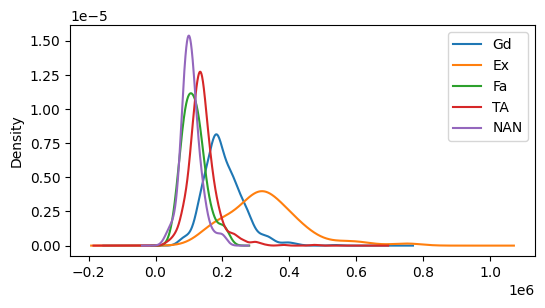

In [30]:

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataCat[dataCat['BsmtQual'] == 'Gd' ]['SalePrice'].plot(kind='kde', ax=ax, label='Gd')
dataCat[dataCat['BsmtQual'] == 'Ex' ]['SalePrice'].plot(kind='kde', ax=ax, label='Ex')
dataCat[dataCat['BsmtQual'] == 'Fa' ]['SalePrice'].plot(kind='kde', ax=ax, label='Fa')
dataCat[dataCat['BsmtQual'] == 'TA' ]['SalePrice'].plot(kind='kde', ax=ax, label='TA')
dataCat[dataCat['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, label='NAN')

plt.legend()
plt.show()

Dada la naturaleza estdística del conjunto de datos faltantes, es adecuado imputar la categoría 'Fa'.

In [31]:
dataHP['BsmtQual'].fillna('Fa', inplace=True)

C:\Users\DC\AppData\Local\Temp\ipykernel_26396\3642995931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataHP['BsmtQual'].fillna('Fa', inplace=True)


### Análisis para columna FireplaceQu

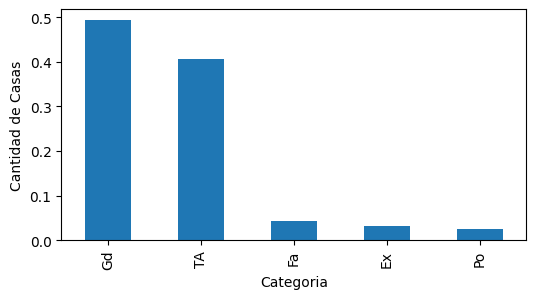

In [32]:
plt.figure(figsize=(6, 3))
dataCat['FireplaceQu'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Categoria")
plt.ylabel("Cantidad de Casas")
plt.show()

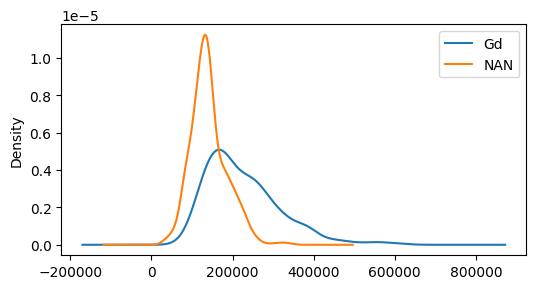

In [33]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataCat[dataCat['FireplaceQu'] == 'Gd' ]['SalePrice'].plot(kind='kde', ax=ax, label='Gd')
#dataCat[dataCat['FireplaceQu'] == 'Ex' ]['SalePrice'].plot(kind='kde', ax=ax, label='Ex')
#dataCat[dataCat['FireplaceQu'] == 'Fa' ]['SalePrice'].plot(kind='kde', ax=ax, label='Fa')
#dataCat[dataCat['FireplaceQu'] == 'TA' ]['SalePrice'].plot(kind='kde', ax=ax, label='TA')
#dataCat[dataCat['FireplaceQu'] == 'Po' ]['SalePrice'].plot(kind='kde', ax=ax, label='Po')
dataCat[dataCat['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, label='NAN')

plt.legend()
plt.show()

In [34]:
dataHP['FireplaceQu'].fillna('Missing', inplace=True)

C:\Users\DC\AppData\Local\Temp\ipykernel_26396\3262793212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataHP['FireplaceQu'].fillna('Missing', inplace=True)


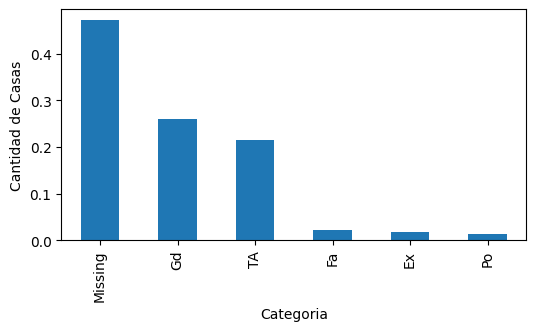

In [35]:
plt.figure(figsize=(6, 3))
dataHP['FireplaceQu'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()
plt.xlabel("Categoria")
plt.ylabel("Cantidad de Casas")
plt.show()

## 2. Codificación de Variables Categóricas

In [36]:
dataCE = dataHP[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']]
dataCE.shape

(1460, 4)

In [37]:
dataCE['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [38]:
pd.get_dummies(dataCE, drop_first=True)

,SalePrice,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,208500,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,181500,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,223500,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,140000,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,250000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1456,210000,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1457,266500,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,142125,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [39]:
dataCE['Neighborhood'].value_counts(ascending=False)

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

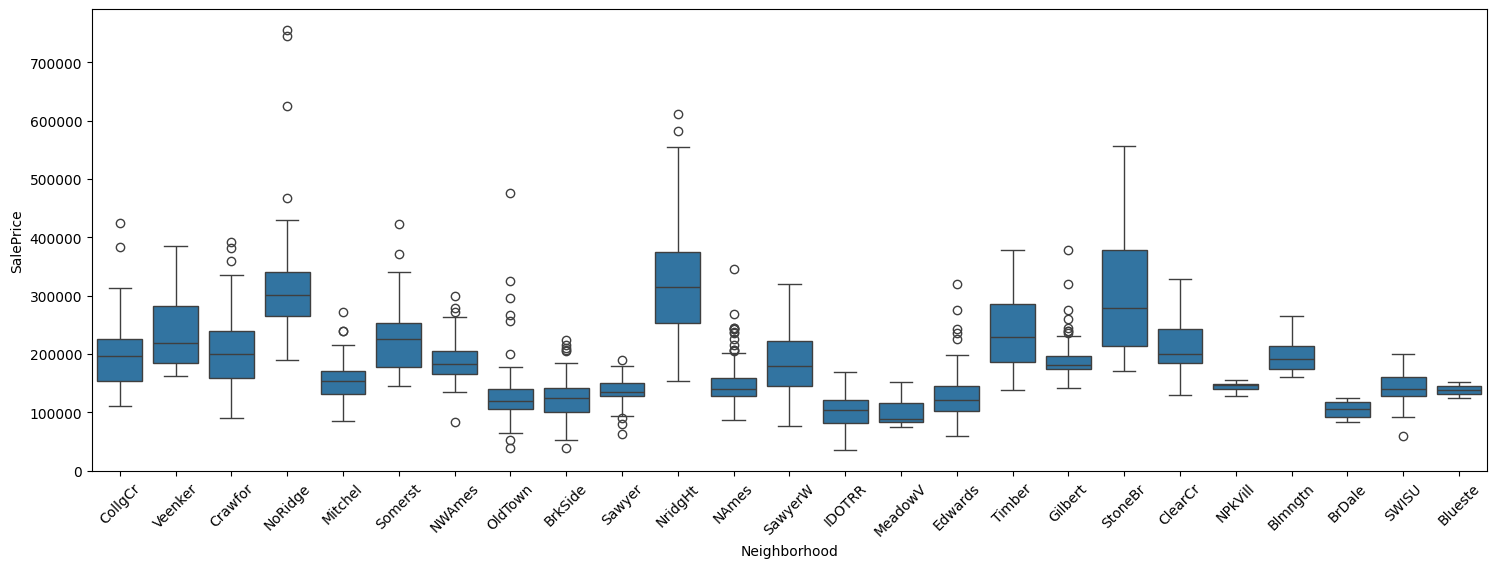

In [40]:
import seaborn as sns

plt.subplots(figsize=(18, 6))

sales = dataCE['SalePrice']
nbh = dataCE['Neighborhood']
sns.boxplot(x=nbh, y=sales)
plt.xticks(rotation=45)
plt.show()

##### Codificación para variable Neighborhood en Fequency Encoding

In [41]:
nbh_freq_dict = dataCE['Neighborhood'].value_counts(ascending=False).to_dict()

In [42]:
dataCE.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000


In [43]:
dataCE['Neighborhood'] = dataCE['Neighborhood'].map(nbh_freq_dict) 

C:\Users\DC\AppData\Local\Temp\ipykernel_26396\3831809119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE['Neighborhood'] = dataCE['Neighborhood'].map(nbh_freq_dict)


In [44]:
dataCE.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,150,VinylSd,VinylSd,208500
1,11,MetalSd,MetalSd,181500
2,150,VinylSd,VinylSd,223500
3,51,Wd Sdng,Wd Shng,140000
4,41,VinylSd,VinylSd,250000


In [45]:
def frequency_encoding_procedure(data_serie):
       freq_dict = data_serie.value_counts(ascending=False).to_dict()
       return data_serie.map(freq_dict)

In [46]:
for col in dataCE.columns:
       dataCE[col] = frequency_encoding_procedure(dataCE[col])

C:\Users\DC\AppData\Local\Temp\ipykernel_26396\858439986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE[col] = frequency_encoding_procedure(dataCE[col])
C:\Users\DC\AppData\Local\Temp\ipykernel_26396\858439986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCE[col] = frequency_encoding_procedure(dataCE[col])
C:\Users\DC\AppData\Local\Temp\ipykernel_26396\858439986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [47]:
dataCE.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,150,515,504,1
1,11,220,214,1
2,150,515,504,2
3,51,206,38,20
4,41,515,504,8


### Tratamiento de Outliers

In [48]:
import seaborn as sns
import scipy.stats as stats

In [49]:
def get_variables_scale(dataset):
       categoricas = [col for col in dataset.columns if dataset[col].dtype == 'object']
       continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) > 30]
       discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64', 'int64'] and len(dataset[col].unique()) <= 30]

       return categoricas, continuas, discretas


In [50]:
cat, cont, disct = get_variables_scale(dataHP)

In [51]:

def plot_outliers_analysis(dataset, col):
       plt.figure(figsize=(10, 2))
       print(col)
       plt.subplot(131)
       dataset[col].hist(bins=50, density=True, color='red')
       plt.title("Densisda - Histogrma")
       plt.subplot(132)
       stats.probplot(dataset[col], dist="norm", plot=plt)
       plt.title("QQ-Plot") 
       plt.subplot(133)
       sns.boxplot(y=dataset[col])
       plt.title("Boxplot")
       plt.show()

Id


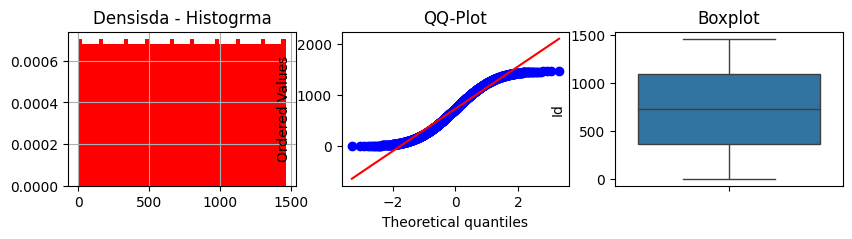

LotFrontage


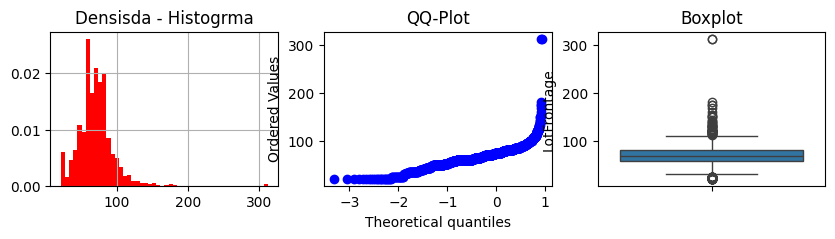

LotArea


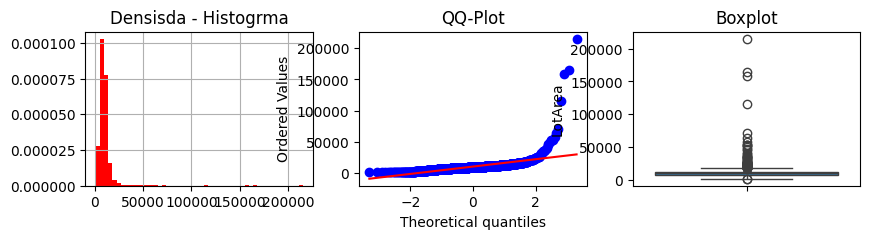

YearBuilt


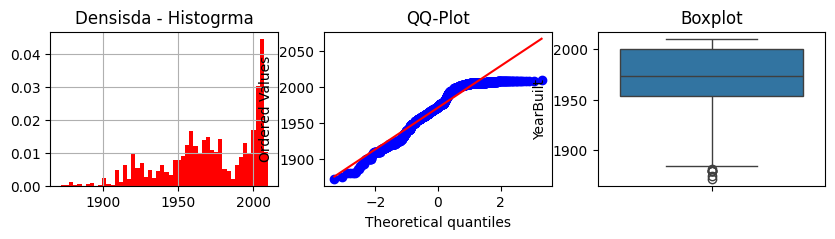

YearRemodAdd


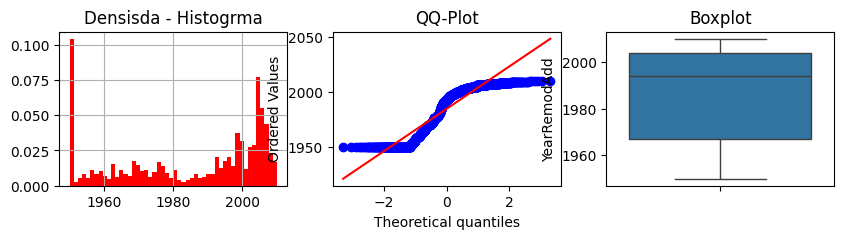

MasVnrArea


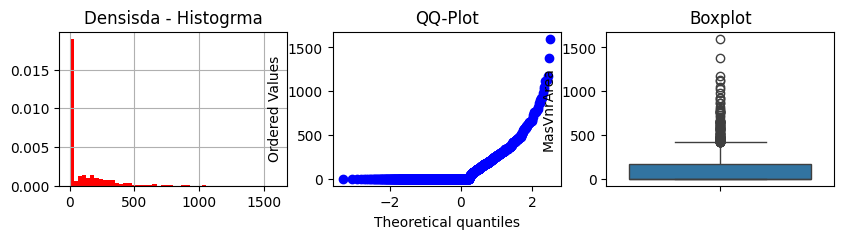

BsmtFinSF1


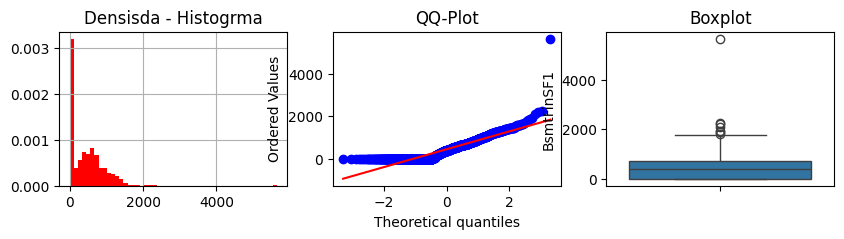

BsmtFinSF2


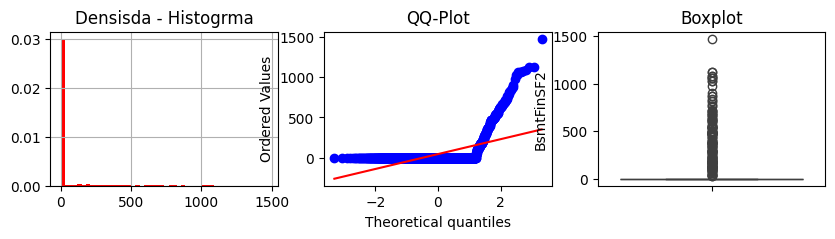

BsmtUnfSF


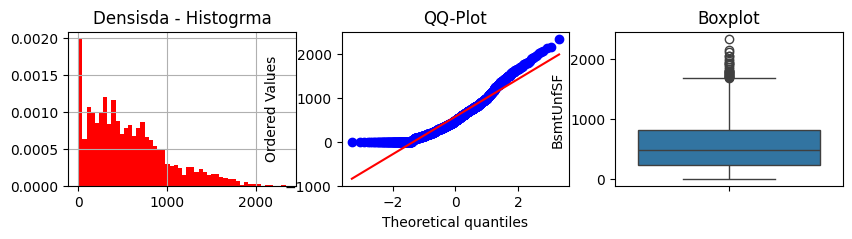

TotalBsmtSF


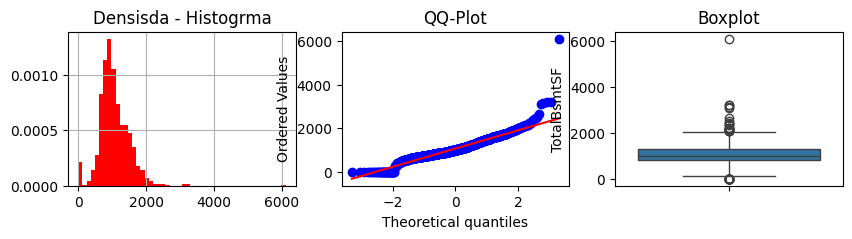

1stFlrSF


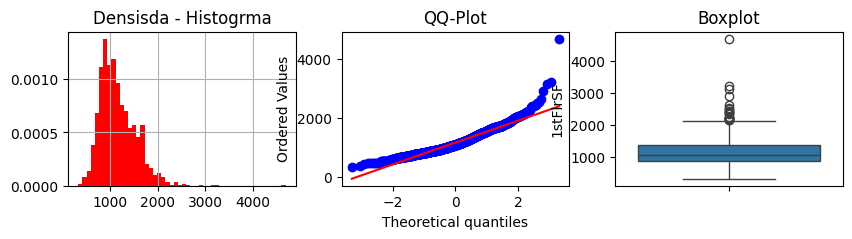

2ndFlrSF


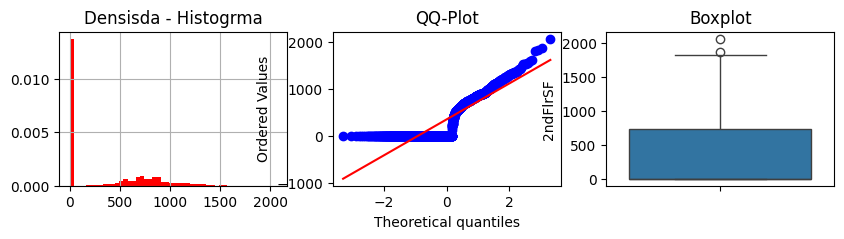

GrLivArea


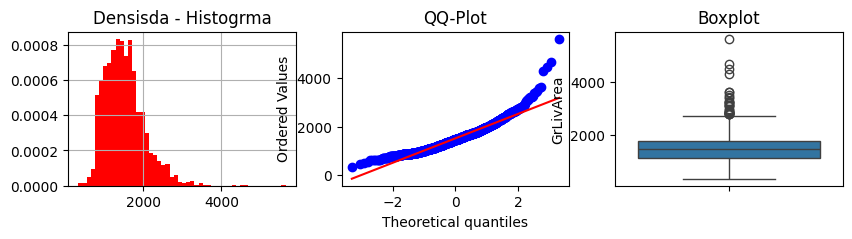

GarageYrBlt


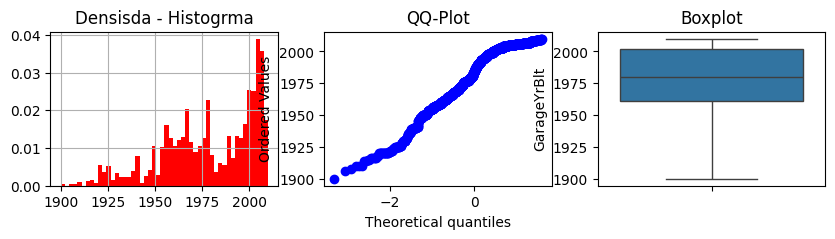

GarageArea


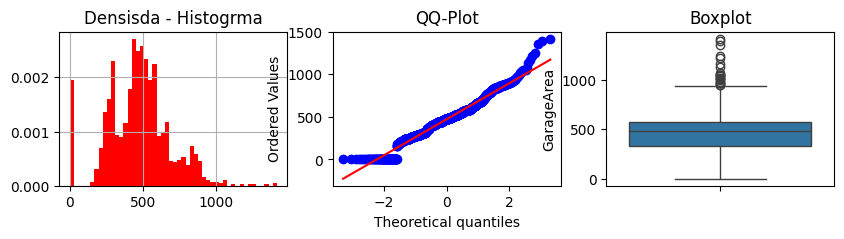

WoodDeckSF


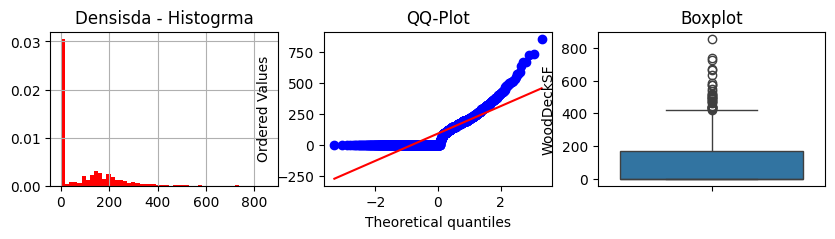

OpenPorchSF


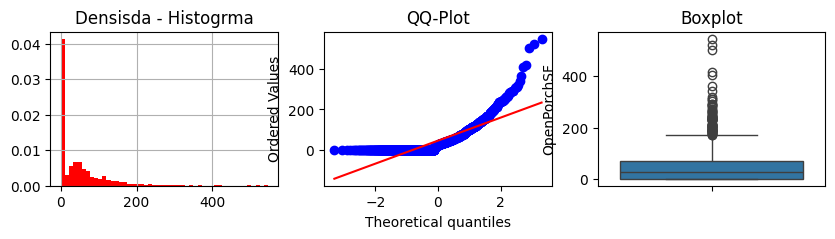

EnclosedPorch


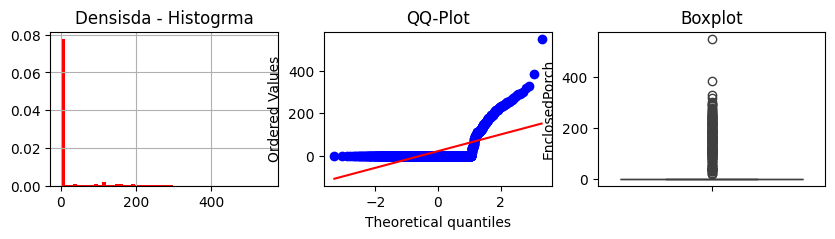

ScreenPorch


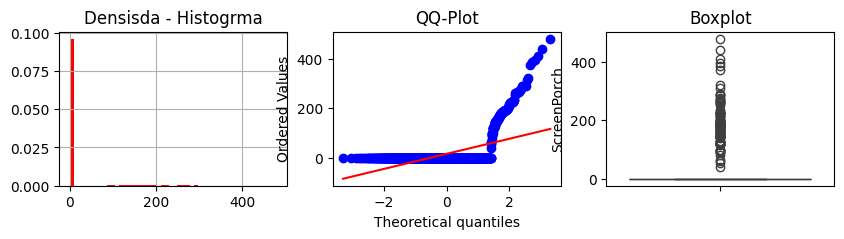

SalePrice


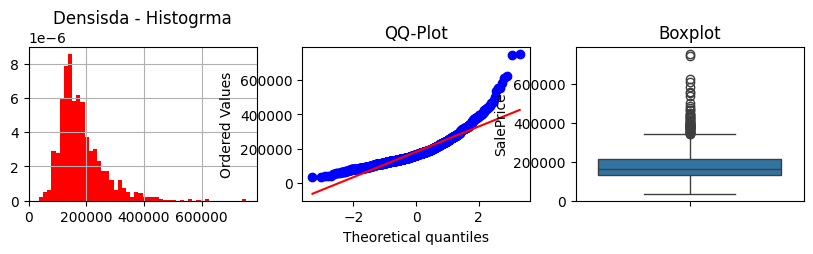

In [52]:
for col in cont:
       plot_outliers_analysis(dataHP, col)

In [53]:
def get_outliers_limits(dataset, col):
       IQR = dataHP[col].quantile(0.75) - dataHP[col].quantile(0.25)
       LI = dataHP[col].quantile(0.25) - (1.5*IQR)
       LS = dataHP[col].quantile(0.75) + (1.5*IQR)

       return LI, LS

In [54]:
get_outliers_limits(dataHP, '1stFlrSF')

(np.float64(118.125), np.float64(2155.125))

1stFlrSF


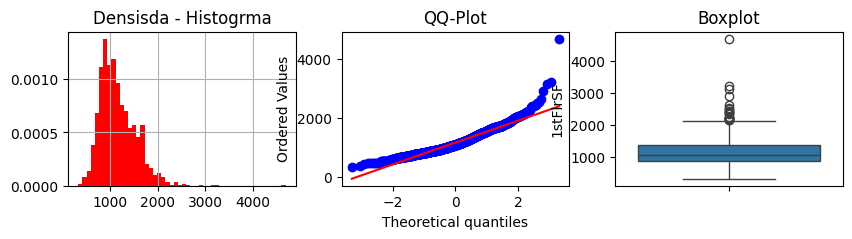

In [55]:
plot_outliers_analysis(dataHP, '1stFlrSF')

In [56]:
LI, LS = get_outliers_limits(dataHP, '1stFlrSF')

dataHP['1stFlrSF_capp'] = np.where(dataHP['1stFlrSF'] > LS, LS, 
                 np.where(dataHP['1stFlrSF'] < LI, LI, 
                 dataHP['1stFlrSF']))

1stFlrSF_capp


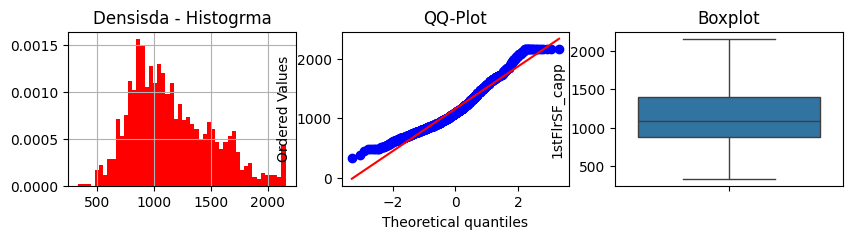

In [57]:
plot_outliers_analysis(dataHP, '1stFlrSF_capp')

In [58]:
LI, LS = get_outliers_limits(dataHP, '1stFlrSF_capp')
LI, LS

(np.float64(118.125), np.float64(2155.125))

### Transformación de Variables

In [59]:
import scipy.stats as stats

In [60]:
continuas = [col for col in dataHP.columns if(dataHP[col].dtype in ['float64', 'int64']) and (len(dataHP[col].unique()) > 30)]
continuas

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 '1stFlrSF_capp']

In [61]:
discretas = [col for col in dataHP.columns if(dataHP[col].dtype in ['float64', 'int64']) and (len(dataHP[col].unique()) <= 30)]
discretas

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [62]:
def plot_density_qq(df, variable):

       plt.figure(figsize = (7, 3))

       plt.subplot(121)
       df[variable].hist(bins=30)
       plt.title(variable)

       plt.subplot(122)
       stats.probplot(df[variable], dist='norm', plot=plt)
       plt.show()


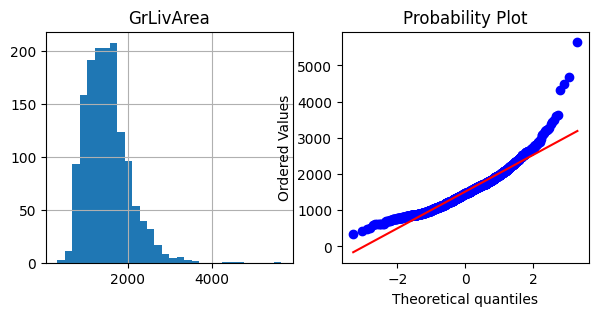

In [63]:
col = "GrLivArea"
plot_density_qq(dataHP, col)

In [64]:
dataHP[col].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

#### Transformación Logarítmica

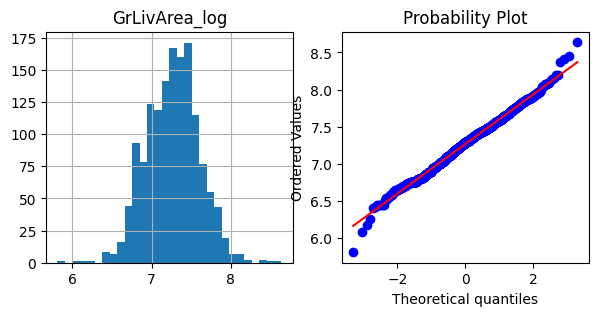

In [65]:
dataHP[col + '_log'] = np.log(dataHP[col])
plot_density_qq(dataHP, col + '_log')

#### Transformación Inversa

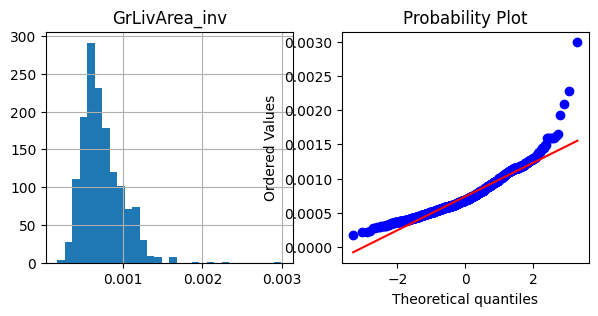

In [66]:
dataHP[col + '_inv'] = 1/(dataHP[col])
plot_density_qq(dataHP, col + '_inv')

### Transforamción Polinomial de Orden 2

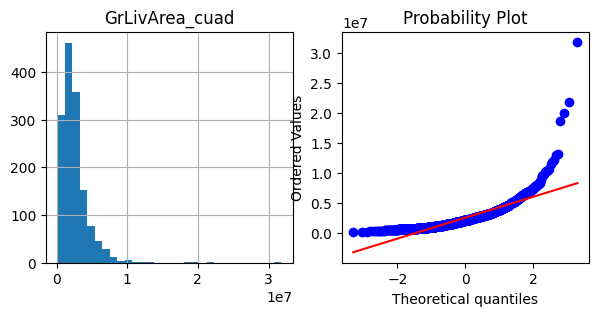

In [67]:
dataHP[col + '_cuad'] = (dataHP[col])**2
plot_density_qq(dataHP, col + '_cuad')

0.0063


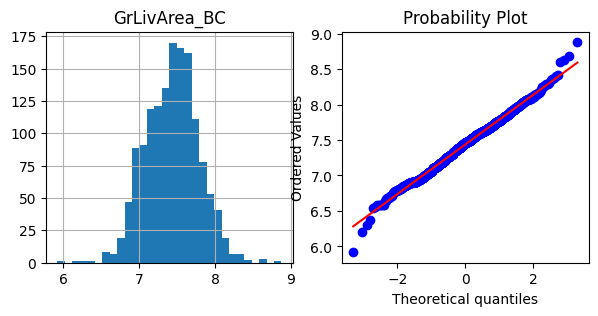

In [68]:
dataHP[col + '_BC'], lmbd  = stats.boxcox(dataHP[col])
lmbd = str(round(lmbd, 4))
print(lmbd)
plot_density_qq(dataHP, col + '_BC')

0.0055


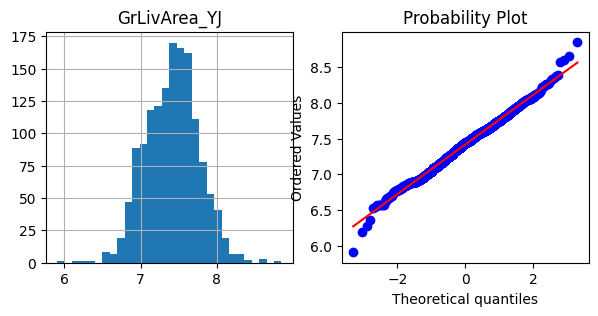

In [69]:
dataHP[col + '_YJ'], lmbd  = stats.yeojohnson(dataHP[col])
lmbd = str(round(lmbd, 4))
print(lmbd)
plot_density_qq(dataHP, col + '_YJ')

### Feature Scaling

In [70]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,1stFlrSF_capp,GrLivArea_log,GrLivArea_inv,GrLivArea_cuad,GrLivArea_BC,GrLivArea_YJ
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,856.0,7.444249,0.000585,2924100,7.621712,7.600485
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,1262.0,7.140453,0.000792,1592644,7.303622,7.284380
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,920.0,7.487734,0.000560,3189796,7.667293,7.645781
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,961.0,7.448334,0.000582,2948089,7.625993,7.604740
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,1145.0,7.695303,0.000455,4831204,7.885039,7.862156


In [71]:
dataHP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MiscVal,MoSold,YrSold,SalePrice,1stFlrSF_capp,GrLivArea_log,GrLivArea_inv,GrLivArea_cuad,GrLivArea_BC,GrLivArea_YJ
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,43.489041,6.321918,2007.815753,180921.195890,1157.018151,7.267774,0.000738,2.572571e+06,7.437227,7.417149
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,496.123024,2.703626,1.328095,79442.502883,362.583002,0.333550,0.000256,2.064173e+06,0.349189,0.346996
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,1.000000,2006.000000,34900.000000,334.000000,5.811141,0.000177,1.115560e+05,5.918908,5.908776
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,5.000000,2007.000000,129975.000000,882.000000,7.029530,0.000563,1.275771e+06,7.187632,7.169113
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,6.000000,2008.000000,163000.000000,1087.000000,7.288928,0.000683,2.143296e+06,7.459007,7.438796
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,0.000000,8.000000,2009.000000,214000.000000,1391.250000,7.482541,0.000885,3.156842e+06,7.661849,7.640371
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,15500.000000,12.000000,2010.000000,755000.000000,2155.125000,8.637994,0.002994,3.183216e+07,8.877541,8.848187


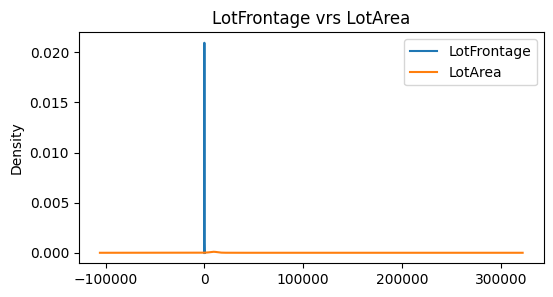

In [72]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataHP['LotFrontage'].plot(kind='kde', ax=ax, label='LotFrontage')
dataHP['LotArea'].plot(kind='kde', ax=ax, label='LotArea')
plt.title("LotFrontage vrs LotArea")

plt.legend()
plt.show()

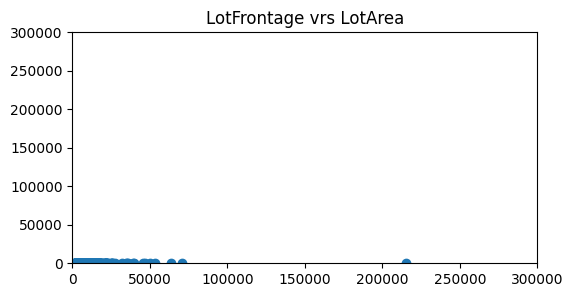

In [73]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=dataHP['LotArea'], y=dataHP['LotFrontage'])
plt.title("LotFrontage vrs LotArea")
plt.xlim((0, 300000))
plt.ylim((0, 300000))

plt.show()

#### Scaling para LotFrontage

In [74]:
min_lf = dataHP['LotFrontage'].min()
max_lf = dataHP['LotFrontage'].max()

dataHP['LotFrontage_minMaxScaled'] = (dataHP['LotFrontage'] - min_lf)/(max_lf - min_lf)

In [75]:
min_lf = dataHP['LotArea'].min()
max_lf = dataHP['LotArea'].max()

dataHP['LotArea_minMaxScaled'] = (dataHP['LotArea'] - min_lf)/(max_lf - min_lf)

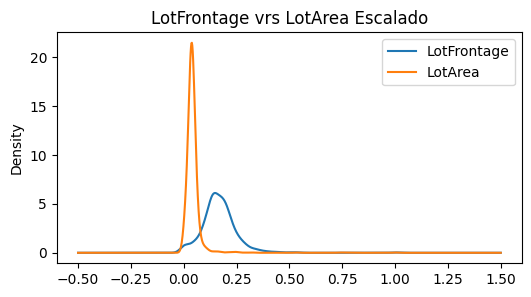

In [76]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
dataHP['LotFrontage_minMaxScaled'].plot(kind='kde', ax=ax, label='LotFrontage')
dataHP['LotArea_minMaxScaled'].plot(kind='kde', ax=ax, label='LotArea')
plt.title("LotFrontage vrs LotArea Escalado")

plt.legend()
plt.show()

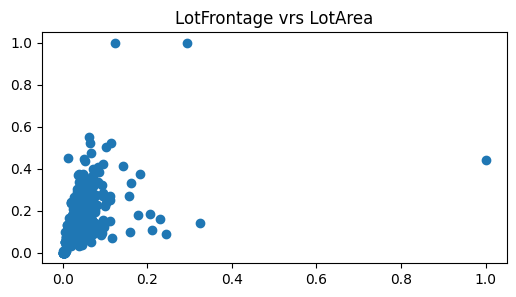

In [77]:
fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(111)
plt.scatter(x=dataHP['LotArea_minMaxScaled'], y=dataHP['LotFrontage_minMaxScaled'])
plt.title("LotFrontage vrs LotArea")

plt.show()

### Proceos de Ingeniería de Características - Feature Engineering Pipeline

0. Determinar escalas de las variables:
 * Numéricas:
   * Continuas.
   * Discretas.
   * Categóricas.

1. Imputación de Variables:
 Se debe hacer para completar el dataset en los casos que es posible.
    * Mixtos - Complete Case Analysis (CCA) - Faltantes <= 5%
    * Numéricas - Faltantes <= 5%:
       * Media.
       * Mediana.
       * Probabilistica - Faltantes <= 20% - Hacer análisis.
       * Eliminar columna para casos con faltantes > 20%

2. Codificación de Variables Categóricas:
 * Se debe hacer para transformar variables que tiene strings en numeros, por que los algoritmos de ML solo entiende numeros.
    * One Hot Encoding - Aplica a 10 o menos clases.
    * Codificación por Frecuencia (recomendado).
    * Target - Label Encoding.

3. Tratamiento de Outliers (solo variables continuas):
* Se debe hacer para evitar modelos con sesgos fuertes generados por minimizar el error con los outliers.
   * Detacción basada en el IQR, usar 1.5*IQR como factor 
   * Capping

4. Transformación de Variables:
 * Se debe hacer por que los modelos asumen que el comportamiento de las variables tiene una distribuación normal. Se debe buscar la mejor (aproximadamente normal).
    * Logarítmica o exponencial.
    * polinomial.
    * inversa/reciproca.
    * Box-Cox
    * Yeo-Johnson

5. Feature Scaling:
 * Se debe hacer por que las escalas muy distintas generan modelos con poca estructura y malos para predecir.
    * MinMaxScaler (0, 1).
    * StandarSacler (-4 , 4).
